## Stock qGAN Results

This notebook is purposed to read and make sense of the results that we acquire across different runs of the Stock qGAN notebook on local simulators as well as cloud quantum simulators.

In [105]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from dataclasses import dataclass
from sklearn.metrics import r2_score, mean_squared_error

In [106]:
@dataclass
class Result:
    name: str
    d_losses: np.ndarray
    g_losses: np.ndarray
    y_train_pred: np.ndarray
    y_train_true: np.ndarray
    y_test_pred: np.ndarray
    y_test_true: np.ndarray

def read_data(path: str) -> Result:
    return Result(
        name=path,
        d_losses=np.loadtxt(f"{path}/stock_qgan_d_losses.txt"),
        g_losses=np.loadtxt(f"{path}/stock_qgan_g_losses.txt"),
        y_train_pred=np.loadtxt(f"{path}/stock_qgan_y_train_pred.txt"),
        y_train_true=np.loadtxt(f"{path}/stock_qgan_y_train_true.txt"),
        y_test_pred=np.loadtxt(f"{path}/stock_qgan_y_test_pred.txt"),
        y_test_true=np.loadtxt(f"{path}/stock_qgan_y_test_true.txt"),
    )

def plot_result(result: Result):
    fig, axd = plt.subplot_mosaic([['train', 'test'], ['loss', 'loss']], figsize=(12, 8))
    axd: dict[str, Axes] = axd # provide typing info

    fig.suptitle(f"Results for {result.name}", fontweight="bold")
    fig.tight_layout()

    axd["train"].set_title(f"GAN prediction on training set")
    axd["train"].plot(result.y_train_true, label="actual", color="black")
    axd["train"].plot(result.y_train_pred, label="prediction", color="blue")
    axd["train"].legend()
    axd["train"].set_xlabel("Days")
    axd["train"].set_ylabel("Price")
    axd["train"].annotate(xy=(0, 170),
                          bbox=dict(boxstyle="round", fc="0.8"), 
                          text=f"""MSE: {mean_squared_error(result.y_train_true, result.y_train_pred):.2f}
RMSE: {math.sqrt(mean_squared_error(result.y_train_true, result.y_train_pred)):.2f}
R2: {r2_score(result.y_train_true, result.y_train_pred):.2f}""")

    axd["test"].set_title(f"GAN prediction on test set")
    axd["test"].plot(result.y_test_true, label="actual", color="black")
    axd["test"].plot(result.y_test_pred, label="prediction", color="blue")
    axd["test"].legend()
    axd["test"].set_xlabel("Days")
    axd["test"].set_ylabel("Price")
    axd["test"].annotate(xy=(120, 180),
                          bbox=dict(boxstyle="round", fc="0.8"), 
                          text=f"""MSE: {mean_squared_error(result.y_test_true, result.y_test_pred):.2f}
RMSE: {math.sqrt(mean_squared_error(result.y_test_true, result.y_test_pred)):.2f}
R2: {r2_score(result.y_test_true, result.y_test_pred):.2f}""")

    axd["loss"].set_title("Training Loss")
    axd["loss"].plot(result.g_losses, label="Generator", color="royalblue")
    axd["loss"].plot(result.d_losses, label="Discriminator", color="magenta")
    axd["loss"].legend()
    axd["loss"].set_xlabel("Epoch")
    axd["loss"].set_ylabel("Loss")

    fig.show()

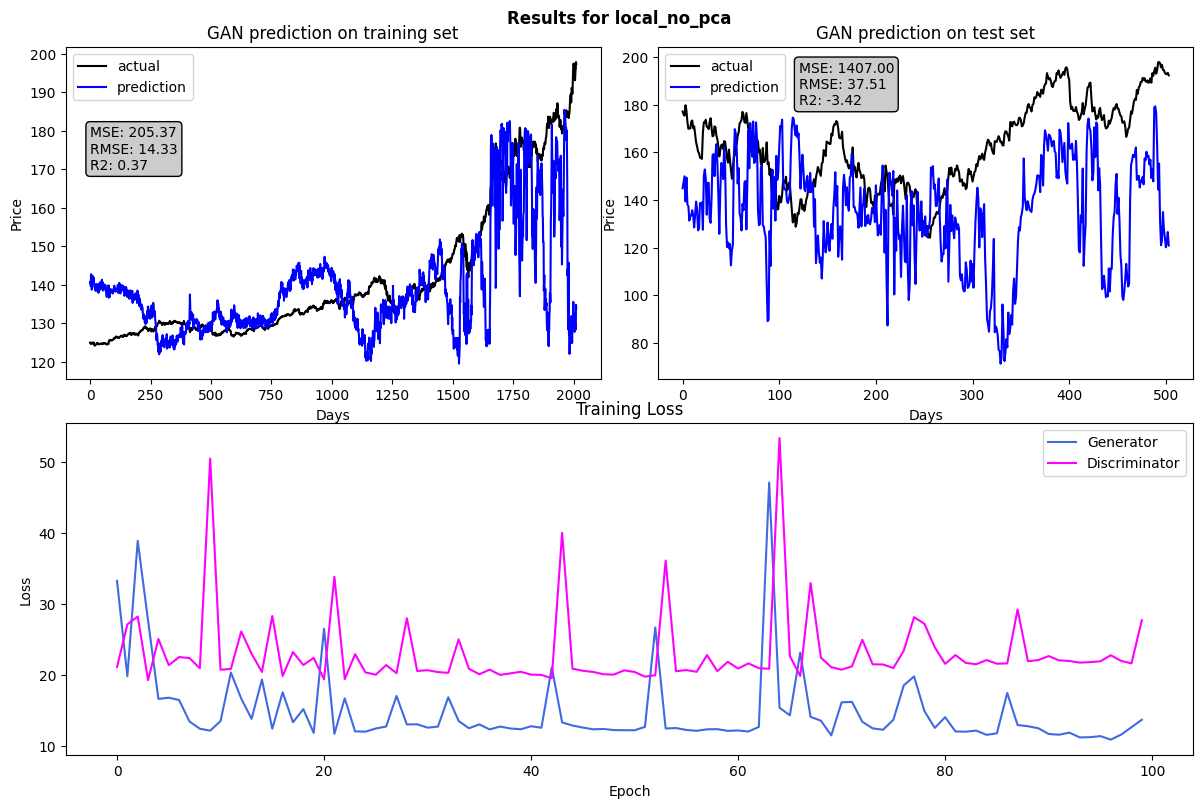

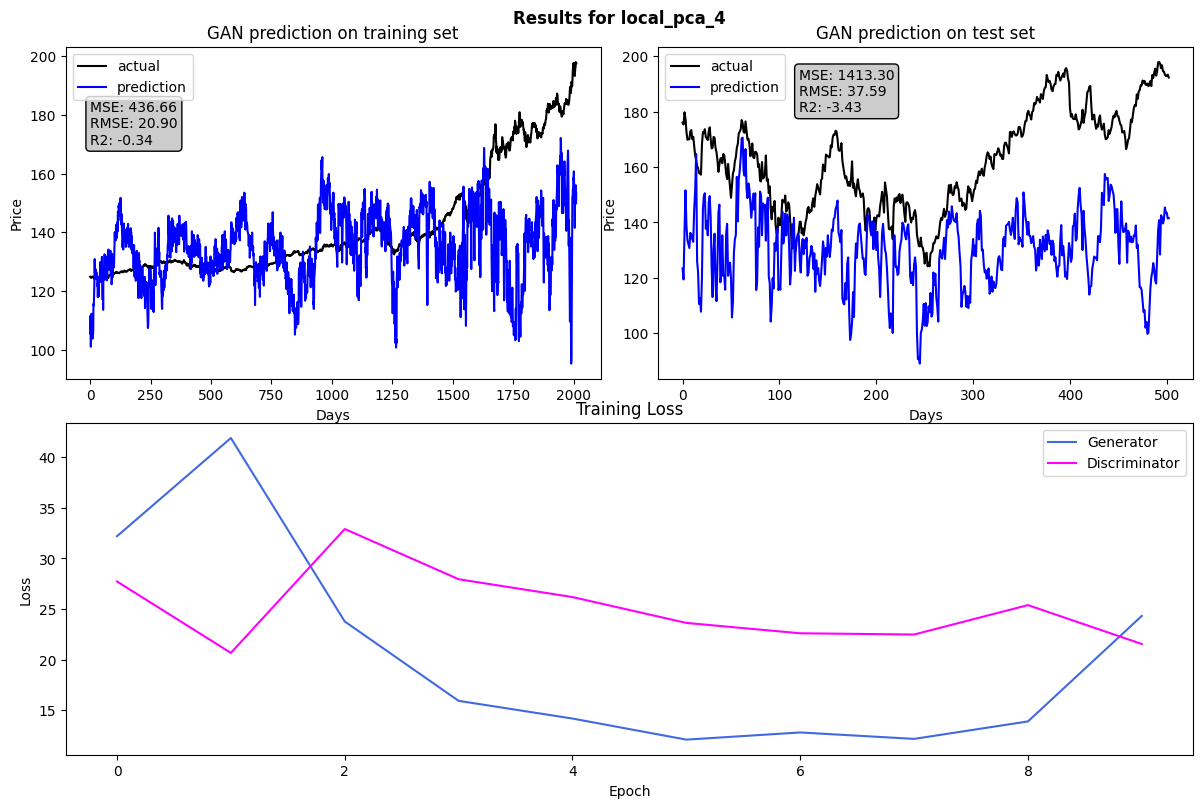

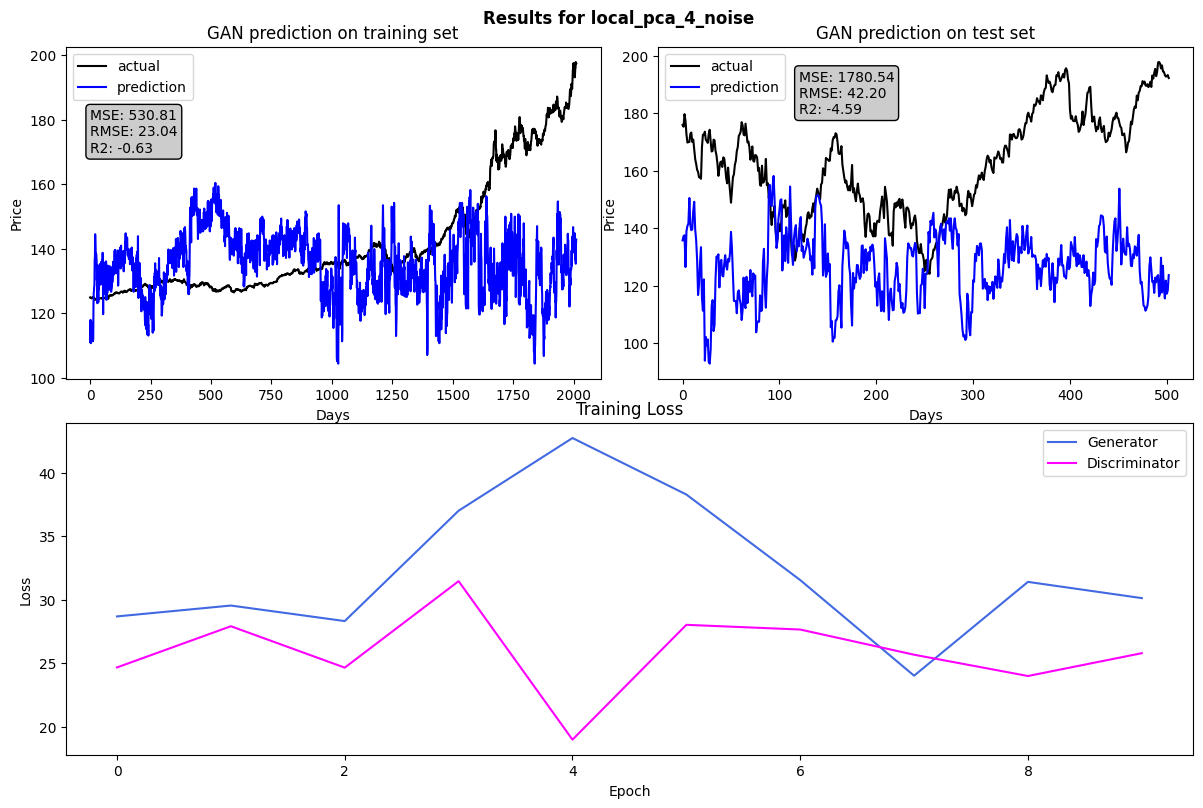

In [107]:
plot_result(read_data("local_no_pca"))
plot_result(read_data("local_pca_4"))
plot_result(read_data("local_pca_4_noise"))